In [2]:
%matplotlib inline
import pandas as pd
import json
import os
from statsbombpy import sb
from mplsoccer import Pitch, Sbopen
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

In [3]:
euros_2024_competition_id = 55
euros_2024_season_id = 282
matches = sb.matches(competition_id=euros_2024_competition_id, season_id=euros_2024_season_id)
spain_matches = matches[(matches['home_team'] == 'Spain') | (matches['away_team'] == 'Spain')]

In [4]:
olmo_shot_data = []

for _, match in spain_matches.iterrows():
    match_id = match['match_id']
    home_team = match['home_team']
    away_team = match['away_team']
    
    parser = Sbopen()
    df, related, freeze, tactics = parser.event(match_id)
    
    df_olmo_shots = df[(df['player_name'] == 'Daniel Olmo Carvajal') & (df['type_name'] == 'Shot')]
    
    if not df_olmo_shots.empty:
        for _, shot in df_olmo_shots.iterrows():
            xG = shot['shot_statsbomb_xg']
            outcome = shot['outcome_name']
            body_part = shot['body_part_name'] if 'body_part_name' in df_olmo_shots.columns else None
            
            olmo_shot_data.append({
                'Player': 'Daniel Olmo Carvajal',
                'Home Team': home_team,
                'Away Team': away_team,
                'xG': xG,
                'Outcome': outcome,
                'Body Part': body_part
            })

df_olmo_shots = pd.DataFrame(olmo_shot_data, columns=['Player', 'Home Team', 'Away Team', 'xG', 'Outcome', 'Body Part'])

average_xG = df_olmo_shots['xG'].mean()
df_olmo_shots['Avg xG'] = average_xG

print(df_olmo_shots)
print(f"Average xG for Dani Olmo: {average_xG:.2f}")

outcome_counts = df_olmo_shots['Outcome'].value_counts()
outcome_summary = pd.DataFrame({
    'Outcome': outcome_counts.index,
    'Count': outcome_counts.values
})

print("\nOutcome Summary:")
print(outcome_summary)

body_part_counts = df_olmo_shots['Body Part'].value_counts()
body_part_summary = pd.DataFrame({
    'Body Part': body_part_counts.index,
    'Count': body_part_counts.values
})

print("\nBody Part Summary:")
print(body_part_summary)



                  Player Home Team Away Team        xG  Outcome   Body Part  \
0   Daniel Olmo Carvajal     Spain   England  0.026549  Blocked  Right Foot   
1   Daniel Olmo Carvajal     Spain   England  0.245579    Off T   Left Foot   
2   Daniel Olmo Carvajal     Spain    France  0.073872     Goal  Right Foot   
3   Daniel Olmo Carvajal     Spain   Germany  0.029002    Saved  Right Foot   
4   Daniel Olmo Carvajal     Spain   Germany  0.163165     Goal  Right Foot   
5   Daniel Olmo Carvajal     Spain   Germany  0.018918  Blocked  Right Foot   
6   Daniel Olmo Carvajal     Spain   Georgia  0.030946  Blocked  Right Foot   
7   Daniel Olmo Carvajal     Spain   Georgia  0.071500  Wayward  Right Foot   
8   Daniel Olmo Carvajal     Spain   Georgia  0.266806    Saved  Right Foot   
9   Daniel Olmo Carvajal     Spain   Georgia  0.128134     Goal   Left Foot   
10  Daniel Olmo Carvajal     Spain   Georgia  0.053031    Saved  Right Foot   
11  Daniel Olmo Carvajal     Spain   Georgia  0.0612

In [5]:
england_matches = matches[(matches['home_team'] == 'England') | (matches['away_team'] == 'England')]
kane_shot_data = []
for _, match in england_matches.iterrows():
    match_id = match['match_id']
    home_team = match['home_team']
    away_team = match['away_team']
    
    parser = Sbopen()
    df, related, freeze, tactics = parser.event(match_id)
    
    df_kane_shots = df[(df['player_name'] == 'Harry Kane') & (df['type_name'] == 'Shot')]
    
    if not df_kane_shots.empty:
        for _, shot in df_kane_shots.iterrows():
            xG = shot['shot_statsbomb_xg']
            outcome = shot['outcome_name']
            body_part = shot['body_part_name'] if 'body_part_name' in df_kane_shots.columns else None
            
            kane_shot_data.append({
                'Player': 'Harry Kane',
                'Home Team': home_team,
                'Away Team': away_team,
                'xG': xG,
                'Outcome': outcome,
                'Body Part': body_part
            })

df_kane_shots = pd.DataFrame(kane_shot_data, columns=['Player', 'Home Team', 'Away Team', 'xG', 'Outcome', 'Body Part'])

average_xG = df_kane_shots['xG'].mean()

df_kane_shots['Avg xG'] = average_xG

print(df_kane_shots)

print(f"Average xG for Kane: {average_xG:.2f}")

outcome_counts = df_kane_shots['Outcome'].value_counts()
outcome_summary = pd.DataFrame({
    'Outcome': outcome_counts.index,
    'Count': outcome_counts.values
})

print("\nOutcome Summary:")
print(outcome_summary)

body_part_counts = df_kane_shots['Body Part'].value_counts()
body_part_summary = pd.DataFrame({
    'Body Part': body_part_counts.index,
    'Count': body_part_counts.values
})

print("\nBody Part Summary:")
print(body_part_summary)



        Player    Home Team    Away Team        xG        Outcome   Body Part  \
0   Harry Kane  Netherlands      England  0.028932          Saved  Right Foot   
1   Harry Kane  Netherlands      England  0.783500           Goal  Right Foot   
2   Harry Kane        Spain      England  0.048372        Blocked  Right Foot   
3   Harry Kane      Denmark      England  0.052687        Blocked   Left Foot   
4   Harry Kane      Denmark      England  0.454891           Goal   Left Foot   
5   Harry Kane      England  Switzerland  0.024831        Wayward        Head   
6   Harry Kane      England  Switzerland  0.043730        Blocked  Right Foot   
7   Harry Kane      England     Slovakia  0.051737        Blocked        Head   
8   Harry Kane      England     Slovakia  0.108595        Blocked  Right Foot   
9   Harry Kane      England     Slovakia  0.161387          Off T        Head   
10  Harry Kane      England     Slovakia  0.121842          Off T  Right Foot   
11  Harry Kane      England 

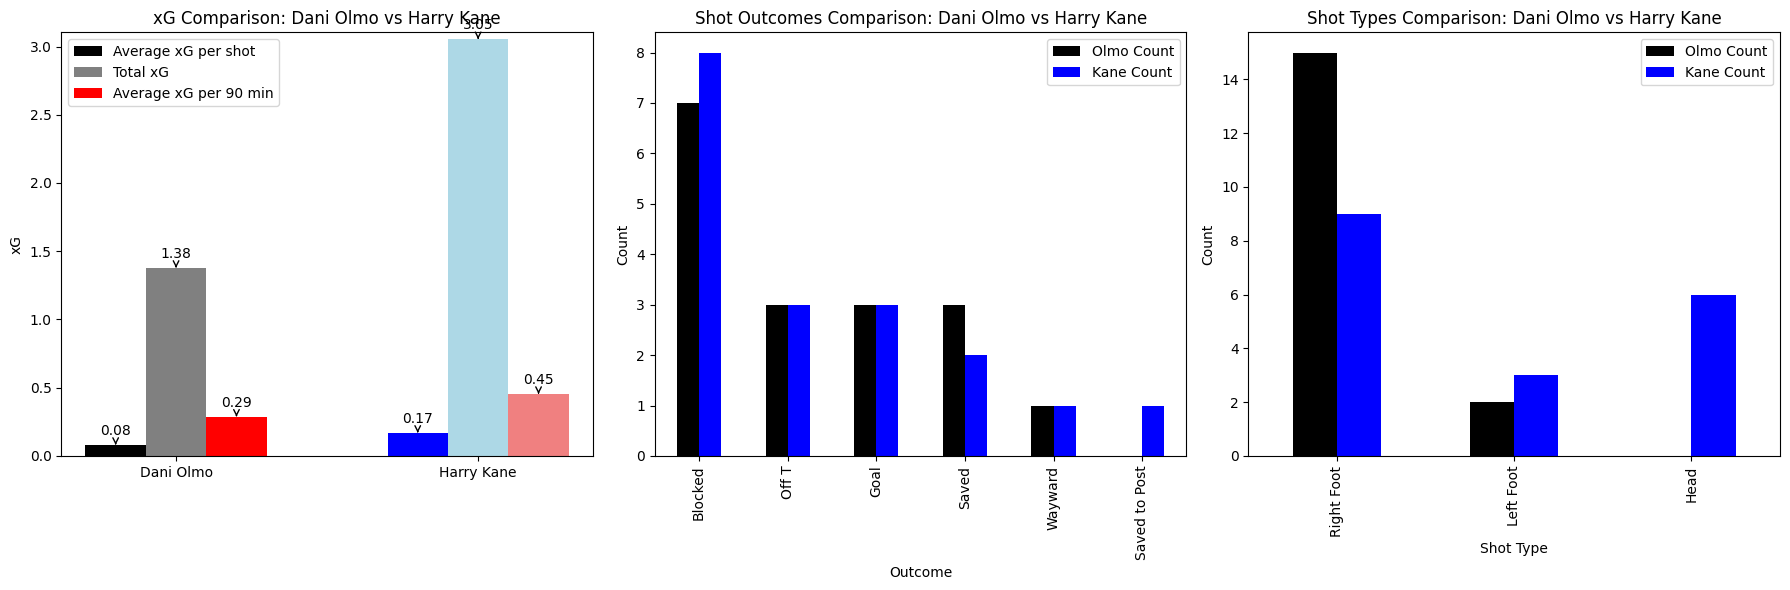

In [6]:
olmo_summary = pd.DataFrame(df_olmo_shots['Outcome'].value_counts()).reset_index()
olmo_summary.columns = ['Outcome', 'Olmo Count']

kane_summary = pd.DataFrame(df_kane_shots['Outcome'].value_counts()).reset_index()
kane_summary.columns = ['Outcome', 'Kane Count']

combined_summary = pd.merge(olmo_summary, kane_summary, on='Outcome', how='outer').fillna(0)

average_xG_olmo = df_olmo_shots['xG'].mean()
average_xG_kane = df_kane_shots['xG'].mean()

total_xG_olmo = df_olmo_shots['xG'].sum()
total_xG_kane = df_kane_shots['xG'].sum()

minutes_played_olmo = 431
minutes_played_kane = 605

average_xG_per_90_olmo = total_xG_olmo / (minutes_played_olmo / 90)
average_xG_per_90_kane = total_xG_kane / (minutes_played_kane / 90)

olmo_shot_type_summary = df_olmo_shots['Body Part'].value_counts().reset_index()
olmo_shot_type_summary.columns = ['Shot Type', 'Olmo Count']

kane_shot_type_summary = df_kane_shots['Body Part'].value_counts().reset_index()
kane_shot_type_summary.columns = ['Shot Type', 'Kane Count']

combined_shot_type_summary = pd.merge(olmo_shot_type_summary, kane_shot_type_summary, on='Shot Type', how='outer').fillna(0)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

width = 0.2  
x = np.arange(2)  

bars_avg = axes[0].bar(x - width, [average_xG_olmo, average_xG_kane], width, label='Average xG per shot', color=['black', 'blue'])

bars_total = axes[0].bar(x, [total_xG_olmo, total_xG_kane], width, label='Total xG', color=['gray', 'lightblue'])

bars_avg_90 = axes[0].bar(x + width, [average_xG_per_90_olmo, average_xG_per_90_kane], width, label='Average xG per 90 min', color=['red', 'lightcoral'])

axes[0].set_title('xG Comparison: Dani Olmo vs Harry Kane')
axes[0].set_ylabel('xG')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['Dani Olmo', 'Harry Kane'])
axes[0].legend()
axes[0].set_ylim(0, max(total_xG_olmo, total_xG_kane, average_xG_per_90_olmo, average_xG_per_90_kane) + 0.05)

for bar in bars_avg:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5), 
                     textcoords="offset points",
                     ha='center', va='bottom',
                     arrowprops=dict(arrowstyle='->', color='black'))

for bar in bars_total:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),  
                     textcoords="offset points",
                     ha='center', va='bottom',
                     arrowprops=dict(arrowstyle='->', color='black'))

for bar in bars_avg_90:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),  
                     textcoords="offset points",
                     ha='center', va='bottom',
                     arrowprops=dict(arrowstyle='->', color='black'))

combined_summary.plot(kind='bar', x='Outcome', y=['Olmo Count', 'Kane Count'], ax=axes[1], color=['black', 'blue'])
axes[1].set_title('Shot Outcomes Comparison: Dani Olmo vs Harry Kane')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Outcome')

combined_shot_type_summary.plot(kind='bar', x='Shot Type', y=['Olmo Count', 'Kane Count'], ax=axes[2], color=['black', 'blue'])
axes[2].set_title('Shot Types Comparison: Dani Olmo vs Harry Kane')
axes[2].set_ylabel('Count')
axes[2].set_xlabel('Shot Type')

plt.tight_layout()
plt.show()
